In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
from IPython.display import display, Math

%reload_ext autoreload
%autoreload 2

# Row and Column Vectors

In [2]:
row_vector = np.array([4,2])
column_vector = np.array([[-2],[3]])

print("This is how we can represent a row vector")
display(Math(sym.latex(sym.sympify(row_vector))))
print("and this is a column vector")
display(Math(sym.latex(sym.sympify(column_vector))))

This is how we can represent a row vector


<IPython.core.display.Math object>

and this is a column vector


<IPython.core.display.Math object>

### Now lets plot the vectors

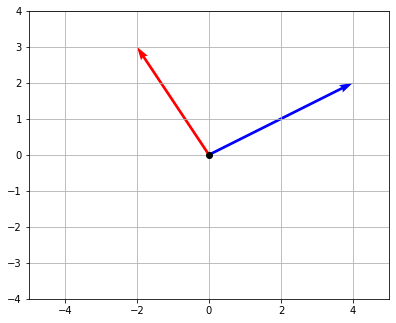

In [3]:
fig_1 = plt.figure(figsize=(5,4))
axes_1 = fig_1.add_axes([1, 1, 1, 1])
axes_1.grid(b=True, which='major') #<-- plot grid lines
axes_1.plot(0,0,'ok') #<-- plot a black point at the origin
axes_1.axis('equal')  #<-- set the axes to the same scale
axes_1.set_xlim(-5, 5)    #<-- set the x axis limits
axes_1.set_ylim(-6, 6)    #<-- set the y axis limits
axes_1.quiver(0,0,row_vector[0],row_vector[1],
              color='blue', angles='xy', scale_units='xy', scale=1)  
axes_1.quiver(0,0,column_vector[0][0], column_vector[1][0],
              color='red',angles='xy', scale_units='xy', scale=1)  


As an exercise we will plot a 3d vector

In [4]:
from mpl_toolkits.mplot3d import Axes3D

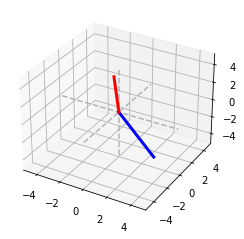

In [5]:
v = np.array([3,0,-4])
w = np.array([-1,1,3])

fig_2 = plt.figure(figsize=plt.figaspect(1))
ax = fig_2.add_subplot(111, projection='3d')


ax.set_xlim3d(-5,5)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,5)

#Plot axes
ax.plot([-5,5], [0,0], [0,0], '--', color=[.7, .7, .7])
ax.plot([0,0], [-5,5], [0,0], '--', color=[.7, .7, .7])
ax.plot([0,0], [0,0], [-5,5], '--', color=[.7, .7, .7])

#plot Vectors
ax.plot([0,v[0]], 
        [0,v[1]],
        [0,v[2]], 'b', linewidth=3)
ax.plot([0,w[0]], 
        [0,w[1]],
        [0,w[2]], 'r', linewidth=3)



# Line Equation: Vector Parametric
Now that we are looking into the representation of vectors in dimensional spaces, lets think about how these vectors can describe a line:

## $\vec{r} = \vec{r_{0}} + t \vec{d}$
where:
- $\vec{r_{0}}$ is a vector representing the base point
- $\vec{d}$ is the directional vector


In [6]:
from vector import Vector
import ipywidgets as widgets
from IPython.display import display



def plot_parametric_line(r0, d, t):
    fig = plt.figure(figsize=(5,4))
    axes = fig.add_axes([1, 1, 1, 1])
    axes.clear()
    axes.grid(b=True, which='major') #<-- plot grid lines
    axes.plot(0,0,'ok') #<-- plot a black point at the origin
    axes.axis('equal')  #<-- set the axes to the same scale
    axes.set_xlim(-10, 10)    #<-- set the x axis limits
    axes.set_ylim(-10, 10)    #<-- set the y axis limits
    
    #Set Vectors
    print(int(r0.coordinates[0]))
    #Base Point Vector
    axes.quiver(0,0,
                int(r0.coordinates[0]),
                int(r0.coordinates[1]), 
                color='orange', angles='xy', 
                scale_units='xy', scale=1)  
    #Direction Vector
    axes.quiver(int(r0.coordinates[0]),int(r0.coordinates[1]),
                int(t*d.coordinates[0]),int(t*d.coordinates[1]), 
                color='yellow',angles='xy', scale_units='xy', scale=1)  
    
    # Compute vector
    line_vector = r0.plus(d)
    axes.quiver(0,0,int(line_vector.coordinates[0]),int(line_vector.coordinates[1]), 
                color='red',angles='xy', scale_units='xy', scale=1)  
    
    #Plot line
    x = np.linspace(-10,10,1)
    
    #m = float((d.coordinates[1] - r0.coordinates[1])) / float((d.coordinates[0] - r0.coordinates[0]))
    #b = float(ro.coordinates[1])
    #y = m*x + b
    #axes.plot(x, y)
    plt.show()
    
    
def update_plot(r0_x, r0_y, dx, dy, t):
    print(r0_x, r0_y, dx, dy)
    r0_vector = Vector([r0_x, r0_y])
    d_vector = Vector([dx, dy])
    plot_parametric_line(r0_vector, d_vector, t)
    

r0_x = widgets.IntSlider(min=-5, 
                          max=5, 
                          value=1,
                          description='r0_x')
r0_y = widgets.IntSlider(min=-5, 
                          max=5, 
                          value=1,
                          description='r0_j')
dx = widgets.IntSlider(min=-5, 
                          max=5, 
                          value=1,
                          description='dx')
dy= widgets.IntSlider(min=-5, 
                          max=5, 
                          value=1,
                          description='dy')
t = widgets.IntSlider(min=-5, 
                          max=5, 
                          value=1,
                          description='t')

widgets.interactive(update_plot, 
                    r0_x=r0_x, 
                    r0_y=r0_y,
                    dx=dx,
                    dy=dy,
                    t=t)

interactive(children=(IntSlider(value=1, description='r0_x', max=5, min=-5), IntSlider(value=1, description='r…